In [4]:
# import packages

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA



In [5]:
# Load Offers
path = "/Users/rahulkosamkar/Documents/Data_Science/Projects/customer_segmentation_clustering/file.xlsx"
offers = pd.read_excel(path, sheet_name=0)


In [6]:
# Load Transactions
transactions = pd.read_excel(path, sheet_name=1)
transactions['n'] = 1

In [7]:
# Merge dataframes
df = pd.merge(transactions, offers)


In [8]:
# Look at the first 5 rows
print(df.head())

  Customer Last Name  Offer #  n Campaign    Varietal  Minimum Qty (kg)  \
0              Smith        2  1  January  Pinot Noir                72   
1          Rodriguez        2  1  January  Pinot Noir                72   
2             Martin        2  1  January  Pinot Noir                72   
3            Jackson        2  1  January  Pinot Noir                72   
4           Campbell        2  1  January  Pinot Noir                72   

   Discount (%)  Origin  Past Peak  
0            17  France      False  
1            17  France      False  
2            17  France      False  
3            17  France      False  
4            17  France      False  


In [9]:
# create pivot table
matrix = df.pivot_table(index='Customer Last Name', columns='Offer #', values='n')


In [10]:
# replace missing values with 0
matrix.fillna(0, inplace=True)


In [11]:
# reindex pivot table
matrix.reset_index(inplace=True)

# display first 5 rows
print(matrix.head())

Offer # Customer Last Name    1    2    3    4    5    6    7    8    9  ...  \
0                    Adams  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
1                    Allen  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  ...   
2                 Anderson  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
3                   Bailey  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  ...   
4                    Baker  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  ...   

Offer #   23   24   25   26   27   28   29   30   31   32  
0        0.0  0.0  0.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  
1        0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  
2        0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  
3        0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  
4        0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  

[5 rows x 33 columns]


In [12]:
# initialize KMeans object
cluster = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=0)

# create 'cluster' column
matrix['cluster'] = cluster.fit_predict(matrix[matrix.columns[1:]])

print(matrix.head())


Offer # Customer Last Name    1    2    3    4    5    6    7    8    9  ...  \
0                    Adams  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
1                    Allen  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  ...   
2                 Anderson  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
3                   Bailey  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  ...   
4                    Baker  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  ...   

Offer #   24   25   26   27   28   29   30   31   32  cluster  
0        0.0  0.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0        0  
1        0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0        2  
2        1.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0        1  
3        0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0        0  
4        0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0        2  

[5 rows x 34 columns]


In [13]:
# initialize pca object with 2 components
pca = PCA(n_components=2, random_state=0)


In [14]:
# create 'x' and 'y' columns donoting observation locations in decomposed form
matrix['x'] = pca.fit_transform(matrix[matrix.columns[1:]])[:,0]
matrix['y'] = pca.fit_transform(matrix[matrix.columns[1:]])[:,1]


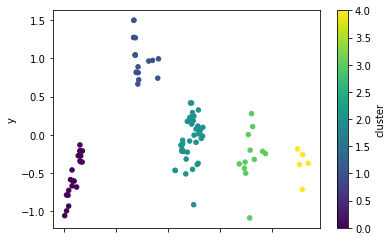

In [15]:
# dataframe to visualize clusters by customer names
clusters = matrix.iloc[:,[0,33,34,35]]

# visualize clusters
clusters.plot.scatter(x='x', y='y', c='cluster', colormap='viridis')
plt.show()

In [16]:
# merge 'clusters' and 'transactions'
data = pd.merge(clusters, transactions)
print(data.head())
print('='*25)



  Customer Last Name  cluster         x         y  Offer #  n
0              Adams        0 -1.852539 -0.461418       18  1
1              Adams        0 -1.852539 -0.461418       29  1
2              Adams        0 -1.852539 -0.461418       30  1
3              Allen        2  0.482911  0.184745        9  1
4              Allen        2  0.482911  0.184745       27  1


In [17]:
# merge `data` and `offers`
data = pd.merge(offers, data)
print(data.head())
print('='*25)


   Offer # Campaign Varietal  Minimum Qty (kg)  Discount (%)  Origin  \
0        1  January   Malbec                72            56  France   
1        1  January   Malbec                72            56  France   
2        1  January   Malbec                72            56  France   
3        1  January   Malbec                72            56  France   
4        1  January   Malbec                72            56  France   

   Past Peak Customer Last Name  cluster         x         y  n  
0      False             Butler        3  1.480626 -0.358515  1  
1      False             Fisher        3  1.577292 -0.201546  1  
2      False             Foster        3  1.625904  0.106931  1  
3      False            Jackson        3  1.605140  0.276741  1  
4      False           Mitchell        2  0.427834  0.416459  1  


In [18]:
# initialzie empty dictionary
champagne = {}

# iterate over every cluster
for val in data.cluster.unique():
    # observation falls in that cluster
    new_df = data[data.cluster == val]
    # sort cluster according to type of 'Varietal'
    counts = new_df['Varietal'].value_counts(ascending=False)
    # check if 'Champagne' is ordered mostly
    if counts.index[0] == 'Champagne':
        # add it to 'champagne'
        champagne[val] = (counts[0])

# get cluster with maximum orders of 'Champagne' 
cluster_champagne = max(champagne, key=champagne.get)

# print out cluster number
print(cluster_champagne)


2


In [19]:
# empty dictionary
discount = {} 

# iterate over cluster numbers
for val in data.cluster.unique():
    # dataframe for every cluster
    new_df = data[data.cluster == val]
    # average discount for cluster
    counts = new_df['Discount (%)'].values.sum() / len(new_df)
    # adding cluster number as key and average discount as value 
    discount[val] = counts

# cluster with maximum average discount
cluster_discount = max(discount, key=discount.get)
print(cluster_discount)

4
